#MNIST Handwritten Digit Classification Dataset
Modified National Institute of Standards and Technology dataset.

> It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [ ]:
#Import libraries and modules
#mnist dataset is already available in the datasets module under Keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.utils import np_utils
from matplotlib import pyplot as plt


In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

#Train: X=(60000, 28, 28), y=(60000,)
#Test: X=(10000, 28, 28), y=(10000,)

In [ ]:
plt.imshow(trainX[0])

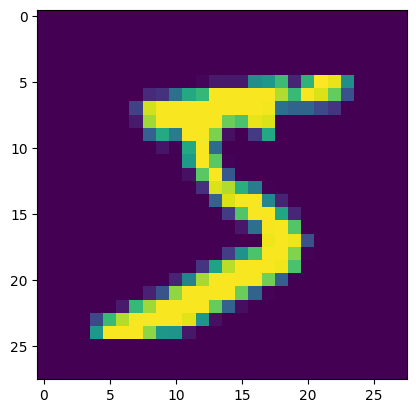

In [ ]:
print(trainy[0])
#trainy holds the actual digit corresponding to the trainX image. i.e 5

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

#Preprocessing

In [ ]:
#input data integers > float
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

In [ ]:
#Convert 1D array to 10D class metriices and view results
trainy = np_utils.to_categorical(trainy, 10)
testy = np_utils.to_categorical(testy, 10)

#trainy[0] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] #actual value was 5

•	Normalize trainX and testX which has integers between 0 and 255 to floats between 0 and 1 by dividing by 255 (grascaling vectors)
•	Convert the Y values trainy and testy which are class data between 0 and 9 to categorical data (as no in Y does not hold value but it is a category)
•	Example : 0,1st ,9th  neuron will fire value
*  0=[1,0,0,0,0,0,0,0,0,0]
*  1=[0,1,0,0,0,0,0,0,0,0]
*   9=[0,0,0,0,0,0,0,0,0,1]
*   5=[0,0,0,0,0,1,0,0,0,0]
  
•	In the example trainy[0] is 5, here 6th class is firing value


In [ ]:
# define cnn model
#def define_model():
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
 # compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 #return model

In [ ]:
model.summary()

"""Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 flatten_2 (Flatten)         (None, 784)               0

 dense_3 (Dense)             (None, 128)               100480

 dropout_1 (Dropout)         (None, 128)               0

 dense_4 (Dense)             (None, 10)                1290

 activation (Activation)     (None, 10)                0

=================================================================
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________"""

•	model.summary provides a summary of each layer including the number of trainable parameters.

•	Only dense layers(fully connected) have trainable parameters.

Flatten the array 28*28 into single vector I,e 29th value is the 2nd rows 1st value so on -> vector of dimention 784
*  Number of trainable parameters = (#neurons in prev layer +1)*(#neurons in next layer)
*  784 +1 * 128 =100480
*  128+1 * 10=1290
*  1 is for the bias

•	model.compile configures the model for training with all the hyperparameters
•	Takes the loss function as a parameter (predicted – actual value difference)
•	Future we need to reduce no of params
•	Output shape in summery – (None,784) here none will be replaced by  60000


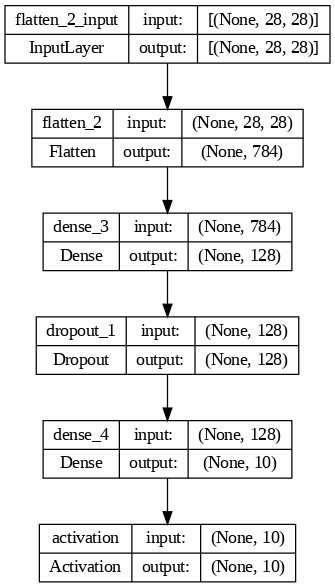

In [ ]:
from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True,rankdir="TB",expand_nested=False,dpi=90)

# Viewing the model
Input Layer: Tensor of as many input samples (see ?), each of dimension 28*28 . ? = 60000
3 dimensional array (tensor)

Layer 1: Flatten each 28*28 image into a 1-D vector of length 784


Layer 2: A fully-connected neural network layer with 128 neurons

Layer 3: Build a 20% Dropout, that is, turn-off 20% neurons randomly in the previous layer each time . Helps each neuron to learn on its own and not depend on others, choosen on random

Layer 4: A fully-connected neural network layer with 10 neurons

Layer 5: Apply softmax activation to normalize across all 10 output neurons. The class which is most likely gets the highest value between 0 and 1 . We r normalizing the output b/w 0 and 1. Eg: it output = 0.6 i.e 0.6 percentage that the image is of class 0
Introduction to
.

In [ ]:
# Model training

# fit model
model.fit(trainX, trainy, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2918 - accuracy: 0.9156
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1426 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1068 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0765 - accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0666 - accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9813
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9828
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.9844
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.04

•	model.fit is used to perform the training of the model

•	epochs – The number of times the model learns through all the training samples

•	batch_size - Number of samples taken in one iteration before updating the weights .

*   Balances between memory utilization and stability
*   Since batch size = 32 and number of samples=60,000, each epoch has 60,000/32=1875 mini-batches	Even tho 1 epoch has to learn 60000 samples ,
*   take only 32 at a time , hence reducing memory usage a time.
*   Each batch – forward propagation adjust weight and back propagation

•	verbose – Provides detailed output after each epoch
•	loss – Loss function value at the end of the epoch . As learning continues loss decreases from 29% to 4% so on
•	accuracy - Calculates how often predictions equal labels. Becomes 1 when all predictions match expected value. In the output of fit function, accuracy is with respect to the training data


In [ ]:
 # evaluate model
score = model.evaluate(testX, testy, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9817


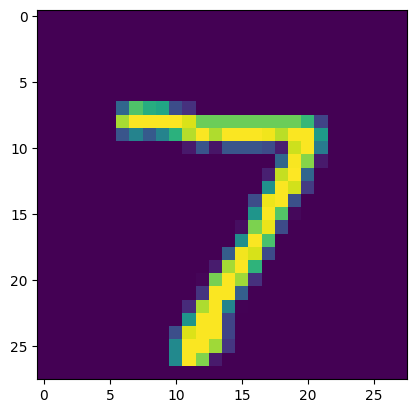

In [ ]:
plt.imshow(testX[0])

In [ ]:
print(testy[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
from numpy import argmax
testX0 = testX[0].reshape(-1,28,28)
prediction = model.predict(testX0)

#generate arg maxes for prediction
predicted_class = argmax(prediction)
print(predicted_class)


1/1 [==============================] - 0s 27ms/step
5


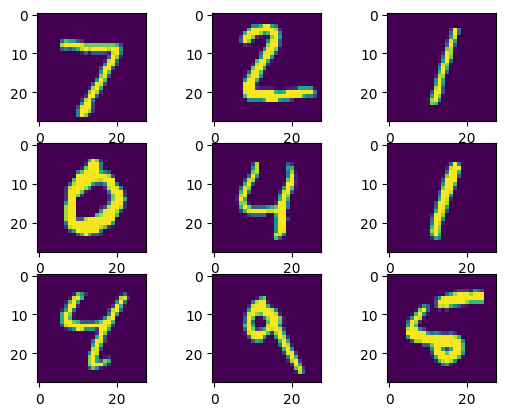

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(testX[i])#, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

•	model.evalulate is used to evaluate the model accuracy with respect to the test data

It is done in batches, where the batch_size is defined during the training of the model.

In this case, number of mini-batches=10,000/32=313

•	accuracy - Calculates how often predictions equal labels. Becomes 1 when all predictions match expected value. In the output of evaluate function, accuracy is with respect to the testing data

•	reshape function is used to “flatten” the test data into a format similar to how the training data was flattened

•	model.predict is used to get the prediction for a test data based on the trained model

•	argmax returns the index of the maximum value of the array, similar functionality as Softmax activation in training

•	We plot the first test image testX[0], expected output testy[0] and the value predicted by the model predicted_class . It predicts as 7
